In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import seaborn as sns

# Loading the dataset

In [ ]:
df1=pd.read_csv("F:/Study Material/Project_Data/fremont-bridge.csv")

# Preprocessing

In [ ]:
df1['Total']=df1['West']+df1['East']
df1.drop(['East','West'],axis=1)
df1.fillna(method='ffill', inplace=True)
df1.isnull().sum()

Date     0
West     0
East     0
Total    0
dtype: int64

In [ ]:
df1.head()

,Date,West,East,Total
0,10-03-2012 00:00,4.0,9.0,13.0
1,10-03-2012 01:00,4.0,6.0,10.0
2,10-03-2012 02:00,1.0,1.0,2.0
3,10-03-2012 03:00,2.0,3.0,5.0
4,10-03-2012 04:00,6.0,1.0,7.0


# Train-test split

In [ ]:
train_data1=df1[:len(df1)-8760]
test_data1=df1[len(train_data1):]

In [ ]:
y_hat_sma = df1.copy()
#Taking 12 months as window
ma_window =720
y_hat_sma['sma_forecast'] = df1['Total'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][len(train_data1):] = y_hat_sma['sma_forecast'][len(train_data1)-1] 

C:\Users\Ajay\AppData\Local\Temp\ipykernel_8996\1268269473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][len(train_data1):] = y_hat_sma['sma_forecast'][len(train_data1)-1]


# Forcasting

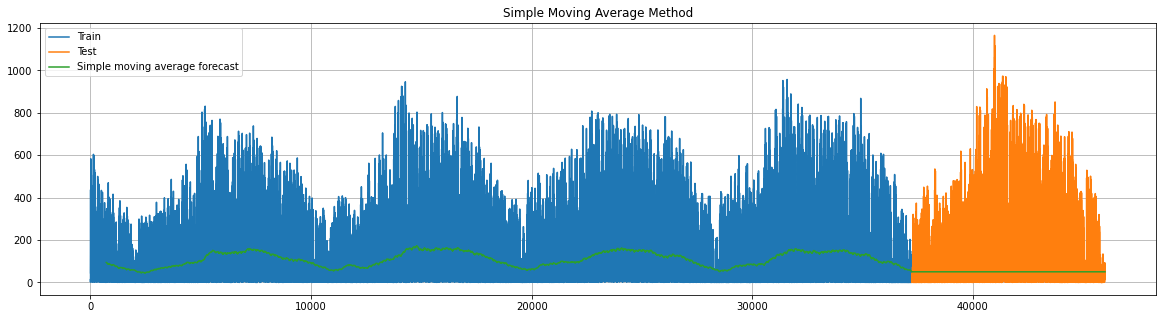

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_data1['Total'], label='Train')
plt.plot(test_data1['Total'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
def eval(y_true,y_predicted):
    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    return mae,rmse,mape

In [ ]:
y_true=test_data1['Total']
y_pred1=y_hat_sma['sma_forecast']
y_pred=y_pred1[len(train_data1)::]
mae,rmse,mape=eval(y_true,y_pred)
print("MAE = {} ; RMSE = {} ; MAPE = {}".format(mae,rmse,mape))

MAE = 96.48430175038051 ; RMSE = 166.30679759012847 ; MAPE = 3482867254634494.5


In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'r', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

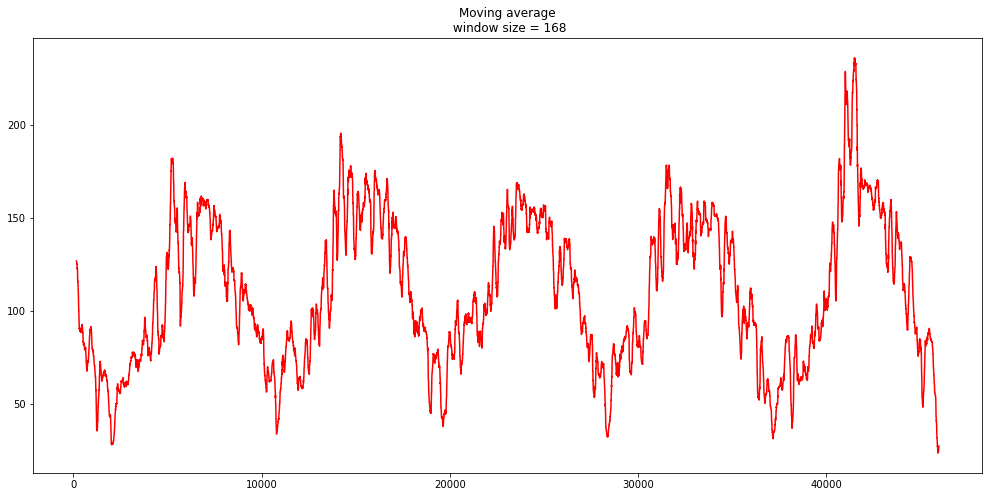

In [ ]:
#Smooth by the previous 7 days (by week) (7*24)
plot_moving_average(df1.Total, 168)

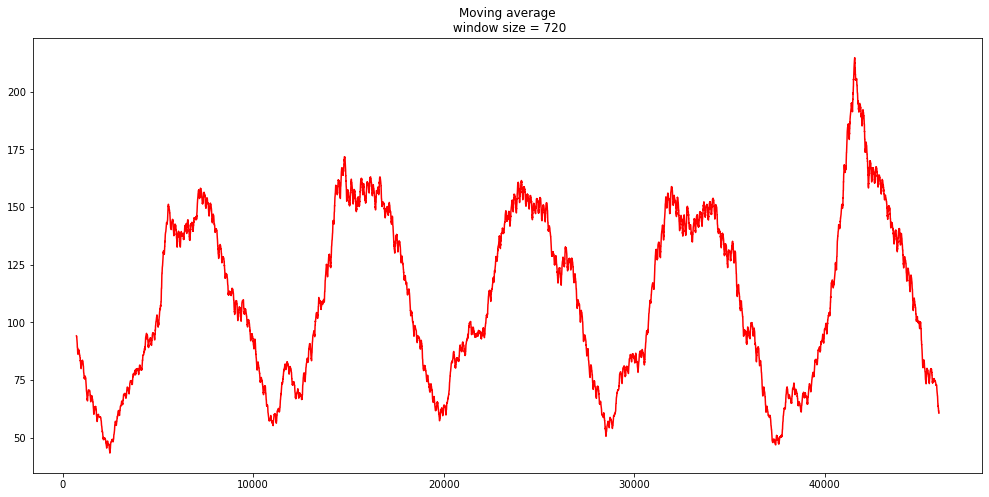

In [ ]:
#Smooth by the previous month (30 days)
plot_moving_average(df1.Total, 720)#, plot_intervals=True)

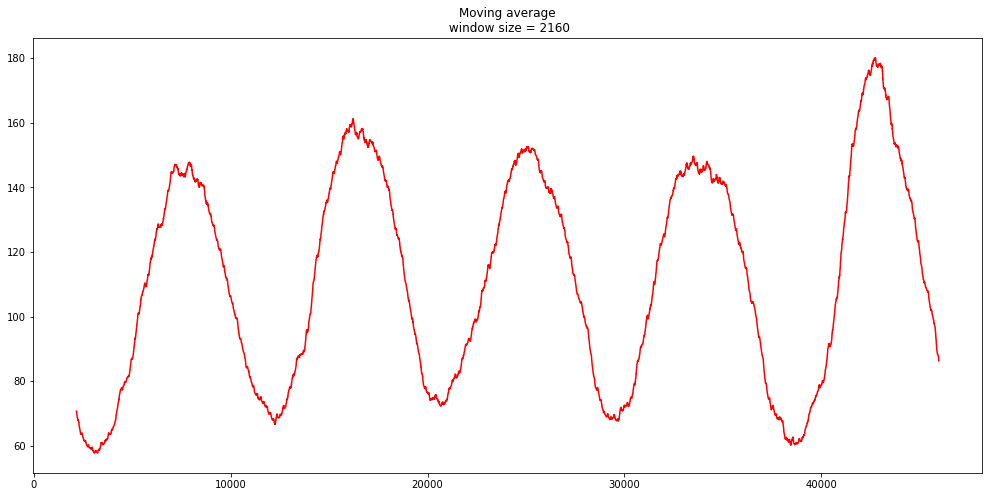

In [ ]:
#Smooth by previous quarter (90 days)
plot_moving_average(df1.Total, 2160)#, plot_intervals=True)